<a href="https://colab.research.google.com/github/emilychiu7/micro_cred_da_winter_2022/blob/main/python/Unit%203/COVID19_Data_Analysis_Unit3_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
#Upload data
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
#Preview the first five rows
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
#Amount of rows, columns
df.shape

(37918, 5)

In [5]:
#Display name of columns and object type
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [6]:
#Preview dataframe to only New York data
ny_df = df[df['state']=='New York']
print(ny_df)

             date     state  fips    cases  deaths
246    2020-03-01  New York    36        1       0
261    2020-03-02  New York    36        1       0
276    2020-03-03  New York    36        2       0
293    2020-03-04  New York    36       11       0
313    2020-03-05  New York    36       22       0
...           ...       ...   ...      ...     ...
37672  2022-01-14  New York    36  4408467   61099
37728  2022-01-15  New York    36  4456337   61193
37784  2022-01-16  New York    36  4507601   61259
37840  2022-01-17  New York    36  4534373   61522
37896  2022-01-18  New York    36  4556685   61859

[689 rows x 5 columns]


In [7]:
#Preview first 5 rows of New York data frame
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [8]:
#Total of 683 New York COVID data
ny_df.shape

(689, 5)

In [9]:
#Preview last 5 rows of NY COVID data
ny_df.tail()

,date,state,fips,cases,deaths
37672,2022-01-14,New York,36,4408467,61099
37728,2022-01-15,New York,36,4456337,61193
37784,2022-01-16,New York,36,4507601,61259
37840,2022-01-17,New York,36,4534373,61522
37896,2022-01-18,New York,36,4556685,61859


In [10]:
#first 5 days where there was a death in NY from COVID
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [11]:
#total number of cases
ny_df['cases'].max()

4556685

In [12]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

976064701

Finding new covid 19 cases on daily basis (new cases added everyday)

In [13]:
#new cases for NY
#type(ny_df['cases'])
ny_df['cases']
newcase = []
previous_case = 0
for index, row in ny_df.iterrows():
#loop
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previous_case = current_case
  newcase.append(newcase_count)
print(newcase_count)

22312


In [14]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [16]:
ny_df.tail()

,date,state,fips,cases,deaths,new_cases
37672,2022-01-14,New York,36,4408467,61099,47352
37728,2022-01-15,New York,36,4456337,61193,47870
37784,2022-01-16,New York,36,4507601,61259,51264
37840,2022-01-17,New York,36,4534373,61522,26772
37896,2022-01-18,New York,36,4556685,61859,22312


In [17]:
#Sum of new cases represents total cases
ny_df['new_cases'].sum()

4556685

In [18]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [19]:
type(ny_new_cases)

pandas.core.series.Series

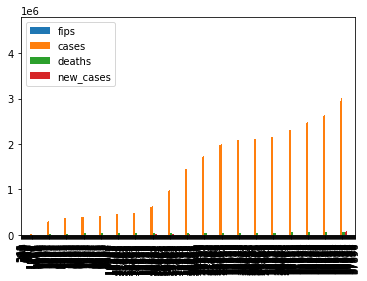

In [20]:
#Bar graph of NY data
ny_df.plot(kind='bar')

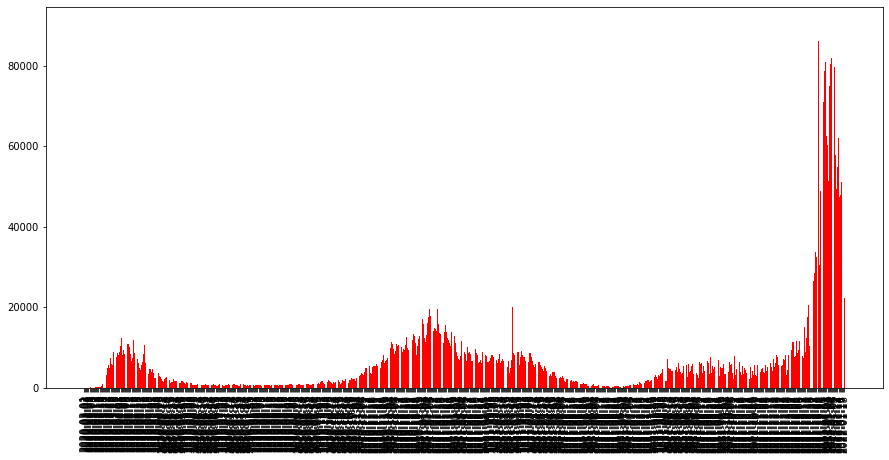

In [21]:
#Bar graph of daily new cases in NY
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task 4: Understand NY covid 19 data in last 30 days

In [22]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [23]:
# ny_dates_30

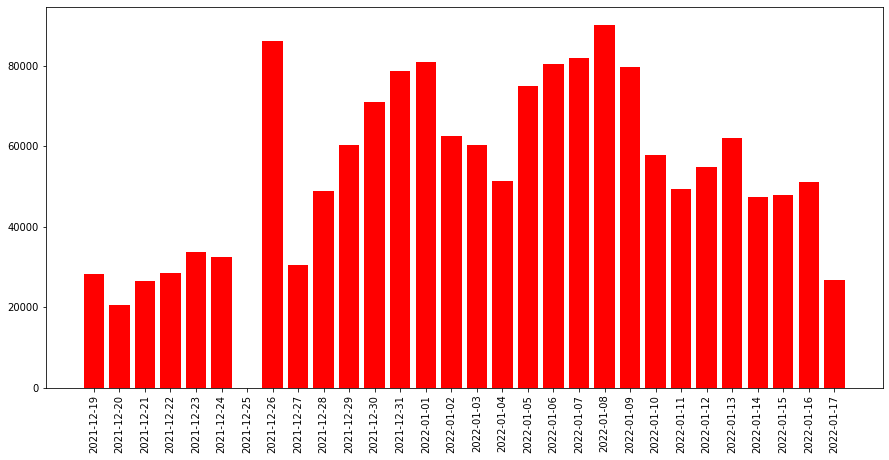

In [24]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
#Rotate x-axis title
plt.xticks(rotation=90)
plt.show()

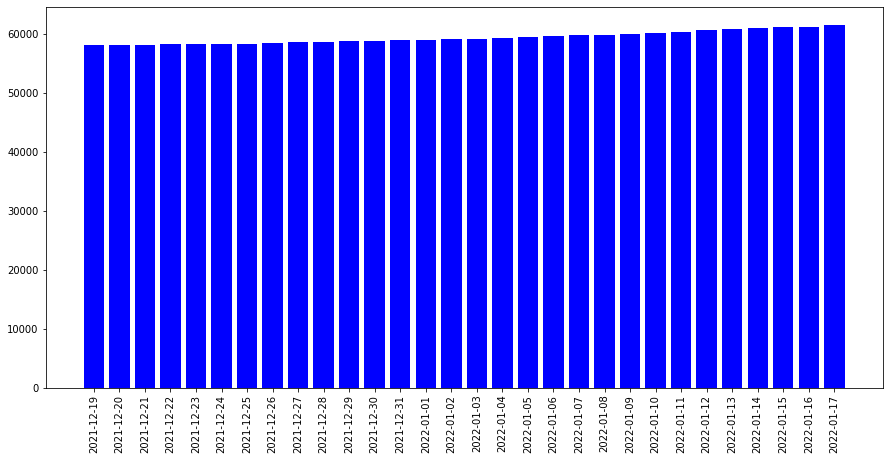

In [25]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

Observation: Slow rise in daily deaths in the last 30 days

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after November 2020 for states: New York, California, Florida, Texas, Arizona

In [26]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

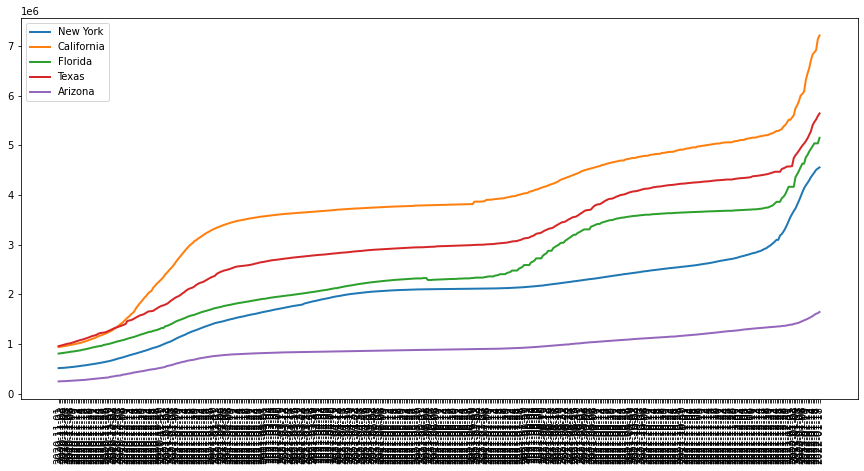

In [27]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Note: This data is up-to-date as of 2022-01-12

As of 2022-01-12, there is a total of 4,299,066 COVID cases since the first case on 2020-03-14. In terms of death, there is a total of 60638	deaths from COVID in NY. The first death took place on 2020-03-14.

From the bar graph of NY COVID data, we can see a gradual growth in cases, as shown by the orange bars. They are significanly higher than death counts, as shown by the green bars.

Examining daily new cases in NY, we see that there were 3 climatic points where the new cases are at its highest before the cases begin to decline. The first point is about 10,000 new cases in a single day, second is about 20,000 new cases. Currently, the cases seem to be at its highest point, with over 80,000 new cases in a single day.

If we look closely at the data of new cases in NY within the last 30 days, we noticed that there is unreported data during 2021-12-25. After 2021-12-26, the cases had fluctuate between 40,000 to about 85,000 cases a day.

On the other hand, we can observe a slow rise in daily deaths in NY in the last 30 days.

In comparison to 5 US states (NY, CA, FL, TX, AZ), we can examine a similar trend in all five states in terms of slow growth and faster growth periods in COVID cases. In general, CA has the highest overall cases while AZ had the lowest overall cases of the 5 states we are examining.

After 2020-11-01, the cases for all five states are increasing steadily.